In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy

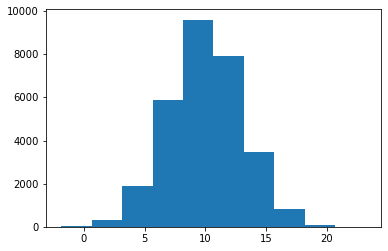

In [2]:
z = lambda a : np.random.normal(10,3,a)
w = z(30000)
plt.hist(w)
plt.show()


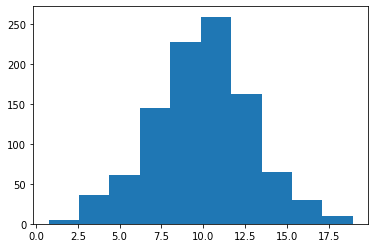

9.933106105506093


In [3]:
w_sub = w[np.random.randint(0,30000,1000)]
plt.hist(w_sub)
plt.show()
mean_sub = np.mean(w_sub)
print(mean_sub)

In [4]:
transition_model = lambda h: [h[0],np.random.normal(h[1],0.5,(1,))]

In [5]:
def prior(x):
    if(x[1] <=0):
        return 0
    return 1

In [6]:
def likelihood(x,data):
    return np.sum(-np.log(x[1] * np.sqrt(2* np.pi) )-((data-x[0])**2) / (2*x[1]**2))

In [7]:
def acceptance(x, x_new):
    if x_new>x:
        return True
    else:
        accept=np.random.uniform(0,1)
        return (accept < (np.exp(x_new-x)))

In [8]:
def metropolis_hastings(likelihood_computer,prior, transition_model, param_init,samples,data,acceptance_rule):
    x = param_init
    accept =[]
    reject = []
    for i in range(samples):
        x_new = transition_model(x)
        x_likelihood = likelihood_computer(x, data)
        x_new_likelihood = likelihood_computer(x_new, data)
        
        if (acceptance_rule(x_likelihood + np.log(prior(x)),x_new_likelihood + np.log(prior(x_new)))):            
            x = x_new
            accept.append(x_new)
            #print("Sample ", i+1, " Accepted")
        else:
            reject.append(x_new) 
            #print("Sample ", i+1, " Rejected")
                
    return np.array(accept, dtype = object), np.array(reject, dtype = object)
        
    

In [9]:
samples = 50000
accept, reject = metropolis_hastings(likelihood,prior,transition_model,[mean_sub,1], samples, w_sub,acceptance)
print(len(accept)/samples *100, "% Accepted")

16.686 % Accepted
